In [33]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree

In [35]:
data = pd.read_csv('madfhantr.csv')
# print(data.head())
# data["Credit_History"].value_counts()
data["Credit_History"].mode()[0]


1.0

In [36]:
print(data.isnull().sum())
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])

categorical_columns = ['Gender','Married','Dependents','Education','Loan_Status','Property_Area','Self_Employed','Loan_Amount_Term'
                      ]

for col in categorical_columns:
    data[col] = data[col].fillna(data[col].mode()[0])

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [37]:
le = LabelEncoder()
print(data["Gender"])
print(data["Gender"].value_counts())
le.fit_transform(data["Gender"])
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

data = data.drop('Loan_ID',axis =1)

# print(data.head())

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object
Gender
Male      502
Female    112
Name: count, dtype: int64


In [38]:
X = data.drop('Loan_Status',axis=1)
y = data['Loan_Status']

In [39]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [44]:

# DecisionTreeClassifier
print(X_train.shape, Y_train.shape)
clf = DecisionTreeClassifier(max_depth = 3,random_state = 42)
clf.fit(X_train,Y_train)

y_ped = clf.predict(X_test)

(429, 11) (429,)


In [10]:
accuracy = accuracy_score(Y_test,y_ped)
print(f'Accuracy: {accuracy*100:.2f}%')

print('Classification Report: ')
print(classification_report(Y_test,y_ped))

print('Confusion Matrix:')
print(confusion_matrix(Y_test,y_ped))

Accuracy: 77.84%
Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.40      0.56        65
           1       0.75      0.98      0.85       120

    accuracy                           0.78       185
   macro avg       0.84      0.69      0.71       185
weighted avg       0.81      0.78      0.75       185

Confusion Matrix:
[[ 26  39]
 [  2 118]]


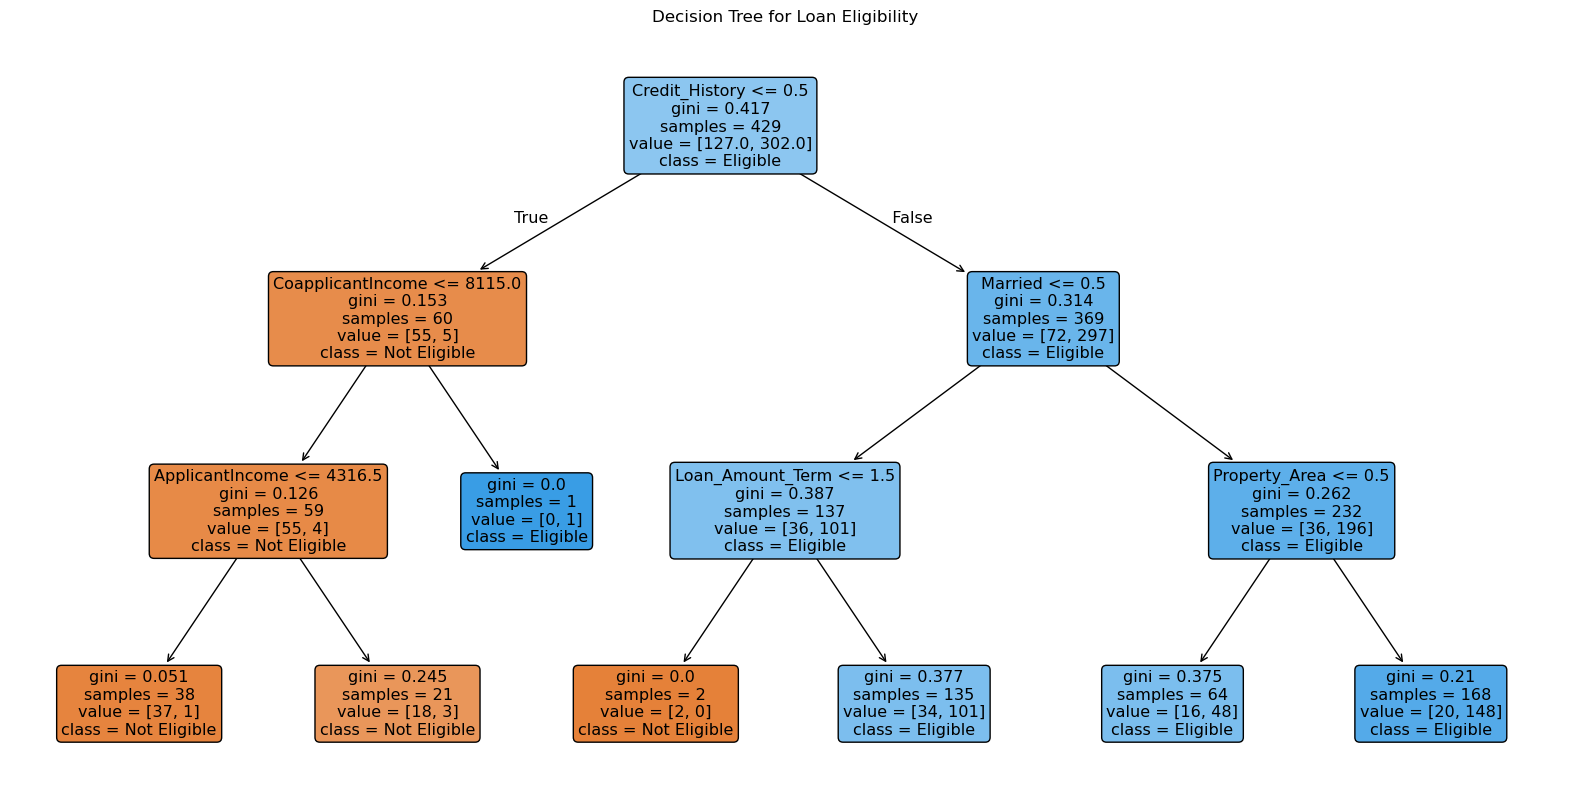

In [11]:
plt.figure(figsize=(20,10))
tree.plot_tree(clf,feature_names=X.columns,class_names=['Not Eligible','Eligible'],filled= True,rounded=True)
plt.title('Decision Tree for Loan Eligibility')
plt.show()

In [12]:
data.shape

(614, 12)